# 1. モジュールインポート

In [1]:
import os
import pandas as pd
import glob
import datetime
from tqdm.auto import tqdm
from modules.constants import Master
from modules.constants import LocalPaths
from modules.constants import HorseResultsCols
from modules.constants import ResultsCols
from modules import preparing
from modules import training
from modules import simulation
from modules import policies
from modules.preparing._get_rawdata import get_all_race_ids

標準的な土日競馬開催時の運用スケジュールを以下の表の通り。

|曜日|時刻|内容|実行する main.ipynb の項番|備考|
|:-:|:--|:--|:--|:--|
|月|||||
|火|||||
|水|16:30過ぎ|先週土日の馬の過去成績ページ確定<BR>（netkeiba.comﾌﾟﾚﾐｱｻｰﾋﾞｽのﾀｲﾑ指数・ﾚｰｽ分析・注目馬 ﾚｰｽ後の短評情報確定）|2. データ取得 ～ 5. シミュレーション|3日間開催の場合も、水曜日|
|木|||||
|金|10:05過ぎ<BR>19:25過ぎ|土曜の出馬表確定<BR>土曜の天候・馬場状態更新|6.1. 前日準備 ～ 6.2. 前日全レース予想（天候・馬場状態は手動設定）<BR>6.1. 前日準備 ～ 6.2. 前日全レース予想||
|土|09:00～17:00<BR>10:05過ぎ<BR>19:25過ぎ| レース時刻<BR>日曜の出馬表確定<BR>日曜の天候・馬場状態更新|6.3. レース直前データ処理（当日レース予想）<BR>6.1. 前日準備 ～ 6.2. 前日全レース予想（天候・馬場状態は手動設定）<BR>6.1. 前日準備 ～ 6.2. 前日全レース予想||
|日|09:00～17:00|レース時刻|6.3. レース直前データ処理（当日レース予想）||

# 2. データ取得

## 2.1. レースID取得
例として、2020年のレースデータを取得する場合を考える

In [2]:
#開催日取得。to_の月は含まないので注意。
kaisai_date_2020 = preparing.scrape_kaisai_date(from_="2018-01-01", to_="2020-01-01")
len(kaisai_date_2020)

getting race date from 2018-01-01 to 2020-01-01


c:\Users\toru7\Documents\Coding\keibaAI-v2-2.1.1\modules\preparing\_scrape_race_id_list.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=from_, end=to_, freq="M")


  0%|          | 0/24 [00:00<?, ?it/s]

219

In [ ]:
# 開催日からレースIDの取得
race_id_list = preparing.scrape_race_id_list(kaisai_date_2020
len(race_id_list)

getting race_id_list


  0%|          | 0/219 [00:00<?, ?it/s]

scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20180106
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20180107
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20180108
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20180113
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20180114
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20180120
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20180121
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20180127
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20180128
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20180203
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20180204
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20180210
scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20180211
scraping: ht

6907

## 2.2. /race/ディレクトリのデータ取得

In [4]:
html_files_race = preparing.scrape_html_race(race_id_list, skip=True)

  0%|          | 0/6907 [00:00<?, ?it/s]

In [5]:
race_id_list = get_all_race_ids()
results_new = preparing.get_rawdata_results(race_id_list) #レース結果テーブルの作成
race_info_new = preparing.get_rawdata_info(race_id_list)
return_tables_new = preparing.get_rawdata_return(race_id_list) #払戻テーブルの作成

preparing raw results table


  0%|          | 0/24171 [00:00<?, ?it/s]

error at 201805010304
list index out of range
error at 202403020501
list index out of range
error at 202403020504
list index out of range
error at 202404010604
list index out of range
error at 202404010605
list index out of range
error at 202404030601
list index out of range
error at 202404030701
list index out of range
error at 202404030704
list index out of range
error at 202407020801
list index out of range
error at 202410020704
list index out of range
error at 202410020705
list index out of range
error at 202410020804
list index out of range
error at 202410030601
list index out of range
preparing raw info table


  0%|          | 0/24171 [00:00<?, ?it/s]

error at race_id 201805010304
'NoneType' object has no attribute 'find_all'
preparing raw return table


  0%|          | 0/24171 [00:00<?, ?it/s]

error at race_id 201805010304
list index out of range
error at race_id 202403020501
list index out of range
error at race_id 202403020504
list index out of range
error at race_id 202404010604
list index out of range
error at race_id 202404010605
list index out of range
error at race_id 202404030601
list index out of range
error at race_id 202404030701
list index out of range
error at race_id 202404030704
list index out of range
error at race_id 202407020801
list index out of range
error at race_id 202410020704
list index out of range
error at race_id 202410020705
list index out of range
error at race_id 202410020804
list index out of range
error at race_id 202410030601
list index out of range


In [6]:
# テーブルの更新。元々のテーブルが存在しない場合は、新たに作成される。
preparing.update_rawdata(filepath=LocalPaths.RAW_RESULTS_PATH, new_df=results_new)
preparing.update_rawdata(filepath=LocalPaths.RAW_RACE_INFO_PATH, new_df=race_info_new)
preparing.update_rawdata(filepath=LocalPaths.RAW_RETURN_TABLES_PATH, new_df=return_tables_new)

## 2.3. /horse/ディレクトリのデータ取得

In [7]:
horse_id_list = results_new['horse_id'].unique()
html_files_horse = preparing.scrape_html_horse(horse_id_list)

  0%|          | 0/40350 [00:00<?, ?it/s]

horse_id 2016104880 skipped
horse_id 2016101840 skipped
horse_id 2016102801 skipped
horse_id 2015104471 skipped
horse_id 2015100493 skipped
horse_id 2015105192 skipped
horse_id 2015102857 skipped
horse_id 2015103853 skipped
horse_id 2015105481 skipped
horse_id 2015103333 skipped
horse_id 2016104676 skipped
horse_id 2016106022 skipped
horse_id 2016104225 skipped
horse_id 2016110048 skipped
horse_id 2016103641 skipped
horse_id 2016101339 skipped
horse_id 2016105913 skipped
horse_id 2015101212 skipped
horse_id 2015100019 skipped
horse_id 2014100409 skipped
horse_id 2015101830 skipped
horse_id 2014100158 skipped
horse_id 2014102483 skipped
horse_id 2015104387 skipped
horse_id 2014104261 skipped
horse_id 2014101392 skipped
horse_id 2014102204 skipped
horse_id 2014101284 skipped
horse_id 2014101669 skipped
horse_id 2015104534 skipped
horse_id 2014104192 skipped
horse_id 2014103036 skipped
horse_id 2014105971 skipped
horse_id 2013100915 skipped
horse_id 2013102529 skipped
horse_id 2014104144 

In [11]:
horse_id_list = pd.read_pickle('data/raw/results.pickle')
horse_id_list =  horse_id_list['horse_id'].unique()
len(horse_id_list)

30896

In [8]:
# 馬の基本情報テーブルの作成
horse_info_new = preparing.get_rawdata_horse_info(horse_id_list)

preparing raw horse_info table


  0%|          | 0/40350 [00:00<?, ?it/s]

In [9]:
# 馬の基本情報テーブルの更新
preparing.update_rawdata(LocalPaths.RAW_HORSE_INFO_PATH, horse_info_new)

In [10]:
#　馬の過去成績テーブルの作成
horse_results_new = preparing.get_rawdata_horse_results(horse_id_list)

preparing raw horse_results table


  0%|          | 0/40350 [00:00<?, ?it/s]

In [11]:
# テーブルの更新
preparing.update_rawdata(LocalPaths.RAW_HORSE_RESULTS_PATH, horse_results_new)

## 2.4. /ped/ディレクトリのデータ取得

In [12]:
html_files_peds = preparing.scrape_html_ped(horse_id_list, skip=True) #htmlをスクレイピング

  0%|          | 0/40350 [00:00<?, ?it/s]

horse_id 2016104880 skipped
horse_id 2016101840 skipped
horse_id 2016102801 skipped
horse_id 2015104471 skipped
horse_id 2015100493 skipped
horse_id 2015105192 skipped
horse_id 2015102857 skipped
horse_id 2015103853 skipped
horse_id 2015105481 skipped
horse_id 2015103333 skipped
horse_id 2016104676 skipped
horse_id 2016106022 skipped
horse_id 2016104225 skipped
horse_id 2016110048 skipped
horse_id 2016103641 skipped
horse_id 2016101339 skipped
horse_id 2016105913 skipped
horse_id 2015101212 skipped
horse_id 2015100019 skipped
horse_id 2014100409 skipped
horse_id 2015101830 skipped
horse_id 2014100158 skipped
horse_id 2014102483 skipped
horse_id 2015104387 skipped
horse_id 2014104261 skipped
horse_id 2014101392 skipped
horse_id 2014102204 skipped
horse_id 2014101284 skipped
horse_id 2014101669 skipped
horse_id 2015104534 skipped
horse_id 2014104192 skipped
horse_id 2014103036 skipped
horse_id 2014105971 skipped
horse_id 2013100915 skipped
horse_id 2013102529 skipped
horse_id 2014104144 

In [14]:
peds_new = preparing.get_rawdata_peds(horse_id_list) #血統テーブルの作成

preparing raw peds table


  0%|          | 0/40350 [00:00<?, ?it/s]

In [12]:
peds_new

,peds_0,peds_1,peds_2,peds_3,peds_4,peds_5,peds_6,peds_7,peds_8,peds_9,...,peds_52,peds_53,peds_54,peds_55,peds_56,peds_57,peds_58,peds_59,peds_60,peds_61
2017101464,000a011155,000a000178,000a001a98,000a0016d4,000a000e04,000a00834c,000a008e05,000a000ded,000a008e04,000a00a104,...,000a008d1d,000a0010ae,000a00734f,1985106928,000a000c51,000a000dfe,000a0071e2,1979101569,000a0002ae,1955104270
2017103291,2008102985,2002100816,000a00033a,000a0012bf,000a000f2b,000a007459,000a008c1e,000a0019b6,000a008c1d,000a0003a2,...,000a009249,000a00101f,000a0073b7,1988105774,000a000819,000a0010ed,000a007f7e,000a0007bf,000a0004bb,000a006fdc
2017103186,2006103308,2000101426,000a00033a,000a0012bf,000a000f2b,000a007459,000a008c1e,000a0019b6,000a008c1d,000a000285,...,000a00b518,000a001c5e,000a000192,000a0117af,000a0017c9,000a0014ce,000a008648,000a006544,000a0012bf,000a0084d8
2017103154,2008103244,2002100816,000a00033a,000a0012bf,000a000f2b,000a007459,000a008c1e,000a0019b6,000a008c1d,000a0003a2,...,000a00859c,000a000e25,000a00859b,1988102243,000a0004d6,000a000e04,000a0071df,1955107422,000a000117,000a0032d2
2017105401,2008103244,2002100816,000a00033a,000a0012bf,000a000f2b,000a007459,000a008c1e,000a0019b6,000a008c1d,000a0003a2,...,000a00a139,000a000f2a,000a00a138,000a011ceb,000a0018c5,000a000dfe,000a00835d,000a011cea,000a011cdd,000a011ce9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014105641,2000101517,000a00033a,000a0012bf,000a000f2b,000a001042,000a0078a6,000a007459,000a0013f0,000a0072a0,000a008c1e,...,000a00923a,000a0010ef,000a0083b1,000a00fabc,000a001d96,000a000e46,000a0089cf,000a00fabd,000a00fa40,000a00fabe
2015105791,2000101426,000a00033a,000a0012bf,000a000f2b,000a001042,000a0078a6,000a007459,000a0013f0,000a0072a0,000a008c1e,...,000a00acaa,000a001607,000a00aca9,000a00abee,000a001b87,000a0000d3,000a00909c,000a00abed,000a0012f7,000a0079de
2016102520,2007102951,000a0022d2,000a001d7e,000a001607,000a000e46,000a007e0c,000a009961,000a001676,000a0084c9,000a009786,...,000a007e1d,000a00159e,000a007e1e,000a010f68,000a010f53,000a002021,000a010f67,000a010f65,000a0012d2,000a010f64
2016101947,2003102991,000a00010f,000a000134,000a001607,000a000e46,000a007e0c,000a0094a9,000a001033,000a000595,000a00a55c,...,000a008892,000a001183,000a0081e9,000a00ae29,000a001678,000a001677,000a0081eb,000a009215,000a001220,000a007400


In [15]:
preparing.update_rawdata(LocalPaths.RAW_PEDS_PATH, peds_new) #テーブルの更新

# 3. データ加工

In [5]:
#モジュールを更新した際、notebookに反映させるために使用。
#すでにインポートしてあるモジュールの更新が反映される。
%autoreload

In [16]:
#前処理
from modules import preprocessing
results_processor = preprocessing.ResultsProcessor(filepath=LocalPaths.RAW_RESULTS_PATH)
race_info_processor = preprocessing.RaceInfoProcessor(filepath=LocalPaths.RAW_RACE_INFO_PATH)
return_processor = preprocessing.ReturnProcessor(filepath=LocalPaths.RAW_RETURN_TABLES_PATH)
horse_info_processor = preprocessing.HorseInfoProcessor(
    filepath=LocalPaths.RAW_HORSE_INFO_PATH)
horse_results_processor = preprocessing.HorseResultsProcessor(
    filepath=LocalPaths.RAW_HORSE_RESULTS_PATH)
peds_processor = preprocessing.PedsProcessor(filepath=LocalPaths.RAW_PEDS_PATH)

c:\Users\toru7\Documents\Coding\keibaAI-v2-2.1.1\modules\preprocessing\_horse_results_processor.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[Cols.PRIZE].fillna(0, inplace=True)


馬の過去成績を集計しつつ、前処理の済みの全てのテーブルをマージする処理

In [17]:
# ターゲットエンコーディング時に「馬の成績」として扱う項目
TARGET_COLS = [
        HorseResultsCols.RANK,
        HorseResultsCols.PRIZE,
        HorseResultsCols.RANK_DIFF, 
        'first_corner',
        'final_corner',
        'first_to_rank',
        'first_to_final',
        'final_to_rank',
        'time_seconds'
        ]
# horse_id列と共に、ターゲットエンコーディングの対象にする列
GROUP_COLS = [
        'course_len',
        'race_type',
        HorseResultsCols.PLACE
        ]

data_merger = preprocessing.DataMerger(
        results_processor,
        race_info_processor,
        horse_results_processor,
        horse_info_processor,
        peds_processor,
        target_cols=TARGET_COLS,
        group_cols=GROUP_COLS
)
# 処理実行
data_merger.merge()

separating horse results by date


  0%|          | 0/755 [00:00<?, ?it/s]

merging horse_results


  0%|          | 0/755 [00:00<?, ?it/s]

In [18]:
#カテゴリ変数の処理
feature_enginnering = preprocessing.FeatureEngineering(data_merger)\
    .add_interval()\
    .add_agedays()\
    .dumminize_ground_state()\
    .dumminize_race_type()\
    .dumminize_sex()\
    .dumminize_weather()\
    .encode_horse_id()\
    .encode_jockey_id()\
    .encode_trainer_id()\
    .encode_owner_id()\
    .encode_breeder_id()\
    .dumminize_kaisai()\
    .dumminize_around()\
    .dumminize_race_class()

In [19]:
#保存
#tmpは一時保存用のディレクトリ
feature_enginnering.featured_data.to_pickle('data/tmp/featured_data_20250407.pickle')

# 4. 学習

In [1]:
import os
import pandas as pd
import glob
import datetime
from tqdm.auto import tqdm
from modules.constants import Master
from modules.constants import LocalPaths
from modules.constants import HorseResultsCols
from modules.constants import ResultsCols
from modules import preparing
from modules import training
from modules import simulation
from modules import policies
from modules.preparing._get_rawdata import get_all_race_ids

In [2]:
data = pd.read_pickle('data/tmp/featured_data_20250407.pickle')
keiba_ai = training.KeibaAIFactory.create(data) #モデル作成

In [3]:
keiba_ai.train_with_tuning() #パラメータチューニングをして学習

[I 2025-04-09 20:59:36,461] A new study created in memory with name: no-name-98be9605-9db6-43bb-8579-a4a153dd15b4
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084822 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
Training until validation scores don't improve for 10 rounds
[100]	valid_0's binary_logloss: 0.42153	valid_1's binary_logloss: 0.465366


feature_fraction, val_score: 0.464757:  14%|#4        | 1/7 [00:11<01:08, 11.41s/it]

Early stopping, best iteration is:
[145]	valid_0's binary_logloss: 0.411298	valid_1's binary_logloss: 0.464757
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800


feature_fraction, val_score: 0.464196:  29%|##8       | 2/7 [00:20<00:51, 10.32s/it]

[100]	valid_0's binary_logloss: 0.422849	valid_1's binary_logloss: 0.464319
Early stopping, best iteration is:
[102]	valid_0's binary_logloss: 0.422302	valid_1's binary_logloss: 0.464196
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.423314	valid_1's binary_logloss: 0.463452


feature_fraction, val_score: 0.462698:  43%|####2     | 3/7 [00:30<00:40, 10.06s/it]

Early stopping, best iteration is:
[127]	valid_0's binary_logloss: 0.417236	valid_1's binary_logloss: 0.462698
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.130406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.422415	valid_1's binary_logloss: 0.464991


feature_fraction, val_score: 0.462698:  57%|#####7    | 4/7 [00:41<00:30, 10.22s/it]

Early stopping, best iteration is:
[127]	valid_0's binary_logloss: 0.417236	valid_1's binary_logloss: 0.462698
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.423876	valid_1's binary_logloss: 0.463411


feature_fraction, val_score: 0.462698:  71%|#######1  | 5/7 [00:51<00:20, 10.18s/it]

Early stopping, best iteration is:
[155]	valid_0's binary_logloss: 0.409307	valid_1's binary_logloss: 0.464831
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421913	valid_1's binary_logloss: 0.465455


feature_fraction, val_score: 0.461915:  86%|########5 | 6/7 [01:03<00:10, 10.90s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.422058	valid_1's binary_logloss: 0.464857


feature_fraction, val_score: 0.461915: 100%|##########| 7/7 [01:14<00:00, 10.68s/it]


Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915


num_leaves, val_score: 0.461915:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.367746	valid_1's binary_logloss: 0.465601


num_leaves, val_score: 0.461915:   5%|5         | 1/20 [00:14<04:37, 14.62s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.407216	valid_1's binary_logloss: 0.465628


num_leaves, val_score: 0.461915:  10%|#         | 2/20 [00:27<04:00, 13.35s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.309572	valid_1's binary_logloss: 0.468028


num_leaves, val_score: 0.461915:  15%|#5        | 3/20 [00:45<04:28, 15.81s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085282 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.298357	valid_1's binary_logloss: 0.468303


num_leaves, val_score: 0.461915:  20%|##        | 4/20 [01:04<04:33, 17.11s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.431702	valid_1's binary_logloss: 0.464554


num_leaves, val_score: 0.461915:  25%|##5       | 5/20 [01:15<03:41, 14.79s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.341183	valid_1's binary_logloss: 0.466468


num_leaves, val_score: 0.461915:  30%|###       | 6/20 [01:31<03:32, 15.19s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.367746	valid_1's binary_logloss: 0.465601


num_leaves, val_score: 0.461915:  35%|###5      | 7/20 [01:47<03:22, 15.55s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.330507	valid_1's binary_logloss: 0.4671


num_leaves, val_score: 0.461915:  40%|####      | 8/20 [02:04<03:12, 16.00s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.398672	valid_1's binary_logloss: 0.463923


num_leaves, val_score: 0.461915:  45%|####5     | 9/20 [02:17<02:45, 15.02s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.321011	valid_1's binary_logloss: 0.467304


num_leaves, val_score: 0.461915:  50%|#####     | 10/20 [02:35<02:39, 15.94s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081212 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.458639	valid_1's binary_logloss: 0.478045


num_leaves, val_score: 0.461915:  55%|#####5    | 11/20 [02:44<02:03, 13.76s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.351486	valid_1's binary_logloss: 0.465722


num_leaves, val_score: 0.461915:  60%|######    | 12/20 [03:00<01:55, 14.40s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.3878	valid_1's binary_logloss: 0.46455


num_leaves, val_score: 0.461915:  65%|######5   | 13/20 [03:15<01:42, 14.66s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.297624	valid_1's binary_logloss: 0.469274


num_leaves, val_score: 0.461915:  70%|#######   | 14/20 [03:37<01:40, 16.72s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.36915	valid_1's binary_logloss: 0.465838


num_leaves, val_score: 0.461915:  75%|#######5  | 15/20 [03:52<01:21, 16.22s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.379586	valid_1's binary_logloss: 0.465308


num_leaves, val_score: 0.461915:  80%|########  | 16/20 [04:06<01:02, 15.70s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.35545	valid_1's binary_logloss: 0.466069


num_leaves, val_score: 0.461915:  85%|########5 | 17/20 [04:22<00:47, 15.83s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.334204	valid_1's binary_logloss: 0.466626


num_leaves, val_score: 0.461915:  90%|######### | 18/20 [04:39<00:32, 16.09s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.086457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.414853	valid_1's binary_logloss: 0.465237


num_leaves, val_score: 0.461915:  95%|#########5| 19/20 [04:50<00:14, 14.70s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082932 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.317819	valid_1's binary_logloss: 0.467828


num_leaves, val_score: 0.461915: 100%|##########| 20/20 [05:08<00:00, 15.41s/it]


Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915


bagging, val_score: 0.461915:   0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.42158	valid_1's binary_logloss: 0.465367


bagging, val_score: 0.461915:  10%|#         | 1/10 [00:12<01:52, 12.50s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.42339	valid_1's binary_logloss: 0.469309


bagging, val_score: 0.461915:  20%|##        | 2/10 [00:23<01:30, 11.37s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421619	valid_1's binary_logloss: 0.464914


bagging, val_score: 0.461915:  30%|###       | 3/10 [00:34<01:19, 11.33s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421753	valid_1's binary_logloss: 0.465046


bagging, val_score: 0.461915:  40%|####      | 4/10 [00:46<01:10, 11.74s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421976	valid_1's binary_logloss: 0.466525


bagging, val_score: 0.461915:  50%|#####     | 5/10 [00:57<00:57, 11.43s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.422293	valid_1's binary_logloss: 0.465147


bagging, val_score: 0.461915:  60%|######    | 6/10 [01:08<00:44, 11.15s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421692	valid_1's binary_logloss: 0.465988


bagging, val_score: 0.461915:  70%|#######   | 7/10 [01:20<00:34, 11.51s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.423889	valid_1's binary_logloss: 0.468967


bagging, val_score: 0.461915:  80%|########  | 8/10 [01:31<00:22, 11.26s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.422626	valid_1's binary_logloss: 0.466703


bagging, val_score: 0.461915:  90%|######### | 9/10 [01:41<00:11, 11.06s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084805 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.42175	valid_1's binary_logloss: 0.465881


bagging, val_score: 0.461915: 100%|##########| 10/10 [01:52<00:00, 11.29s/it]


Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915


feature_fraction_stage2, val_score: 0.461915:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421705	valid_1's binary_logloss: 0.464453


feature_fraction_stage2, val_score: 0.461915:  17%|#6        | 1/6 [00:12<01:03, 12.75s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421796	valid_1's binary_logloss: 0.464947


feature_fraction_stage2, val_score: 0.461915:  33%|###3      | 2/6 [00:24<00:48, 12.20s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421677	valid_1's binary_logloss: 0.465173


feature_fraction_stage2, val_score: 0.461915:  50%|#####     | 3/6 [00:36<00:36, 12.25s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421898	valid_1's binary_logloss: 0.464749


feature_fraction_stage2, val_score: 0.461915:  67%|######6   | 4/6 [00:48<00:23, 11.81s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.422064	valid_1's binary_logloss: 0.46424


feature_fraction_stage2, val_score: 0.461915:  83%|########3 | 5/6 [00:59<00:11, 11.66s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084878 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421572	valid_1's binary_logloss: 0.465515


feature_fraction_stage2, val_score: 0.461915: 100%|##########| 6/6 [01:11<00:00, 11.90s/it]


Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915


regularization_factors, val_score: 0.461915:   0%|          | 0/20 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.422036	valid_1's binary_logloss: 0.46586


regularization_factors, val_score: 0.461915:   5%|5         | 1/20 [00:12<03:48, 12.02s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421913	valid_1's binary_logloss: 0.465455


regularization_factors, val_score: 0.461915:  10%|#         | 2/20 [00:24<03:41, 12.29s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.423887	valid_1's binary_logloss: 0.464293


regularization_factors, val_score: 0.461915:  15%|#5        | 3/20 [00:37<03:36, 12.72s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081741 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.423767	valid_1's binary_logloss: 0.46457


regularization_factors, val_score: 0.461915:  20%|##        | 4/20 [00:49<03:19, 12.49s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080790 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421914	valid_1's binary_logloss: 0.465455


regularization_factors, val_score: 0.461915:  25%|##5       | 5/20 [01:02<03:06, 12.41s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085507 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.423372	valid_1's binary_logloss: 0.464155


regularization_factors, val_score: 0.461915:  30%|###       | 6/20 [01:14<02:51, 12.28s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.117088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421914	valid_1's binary_logloss: 0.465455


regularization_factors, val_score: 0.461915:  35%|###5      | 7/20 [01:26<02:38, 12.21s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.422089	valid_1's binary_logloss: 0.465507


regularization_factors, val_score: 0.461915:  40%|####      | 8/20 [01:39<02:29, 12.47s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.129178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.422105	valid_1's binary_logloss: 0.465108


regularization_factors, val_score: 0.461915:  45%|####5     | 9/20 [01:51<02:16, 12.43s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.42171	valid_1's binary_logloss: 0.46515


regularization_factors, val_score: 0.461915:  50%|#####     | 10/20 [02:03<02:03, 12.38s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.094515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421913	valid_1's binary_logloss: 0.465455


regularization_factors, val_score: 0.461915:  55%|#####5    | 11/20 [02:16<01:52, 12.45s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.116659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421815	valid_1's binary_logloss: 0.465164


regularization_factors, val_score: 0.461915:  60%|######    | 12/20 [02:29<01:40, 12.62s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.4221	valid_1's binary_logloss: 0.465057


regularization_factors, val_score: 0.461915:  65%|######5   | 13/20 [02:41<01:26, 12.30s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.109831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.424375	valid_1's binary_logloss: 0.464052


regularization_factors, val_score: 0.461915:  70%|#######   | 14/20 [02:53<01:13, 12.29s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421977	valid_1's binary_logloss: 0.465253


regularization_factors, val_score: 0.461915:  75%|#######5  | 15/20 [03:05<01:01, 12.22s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089771 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421913	valid_1's binary_logloss: 0.465455


regularization_factors, val_score: 0.461915:  80%|########  | 16/20 [03:18<00:49, 12.49s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.087494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.422087	valid_1's binary_logloss: 0.465529


regularization_factors, val_score: 0.461915:  85%|########5 | 17/20 [03:30<00:36, 12.21s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078946 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.422457	valid_1's binary_logloss: 0.464263


regularization_factors, val_score: 0.461915:  90%|######### | 18/20 [03:42<00:24, 12.23s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.133862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421953	valid_1's binary_logloss: 0.4654


regularization_factors, val_score: 0.461915:  95%|#########5| 19/20 [03:55<00:12, 12.49s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.081689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.422162	valid_1's binary_logloss: 0.465349


regularization_factors, val_score: 0.461915: 100%|##########| 20/20 [04:07<00:00, 12.40s/it]


Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915


min_child_samples, val_score: 0.461915:   0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.422296	valid_1's binary_logloss: 0.46492


min_child_samples, val_score: 0.461915:  20%|##        | 1/5 [00:12<00:48, 12.20s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.088590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.42256	valid_1's binary_logloss: 0.46481


min_child_samples, val_score: 0.461915:  40%|####      | 2/5 [00:24<00:36, 12.11s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421304	valid_1's binary_logloss: 0.465595


min_child_samples, val_score: 0.461915:  60%|######    | 3/5 [00:35<00:23, 11.90s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.421394	valid_1's binary_logloss: 0.464944


min_child_samples, val_score: 0.461915:  80%|########  | 4/5 [00:48<00:12, 12.16s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915
[LightGBM] [Info] Number of positive: 35535, number of negative: 128165
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.110106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38532
[LightGBM] [Info] Number of data points in the train set: 163700, number of used features: 222
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.217074 -> initscore=-1.282800
[LightGBM] [Info] Start training from score -1.282800
[100]	valid_0's binary_logloss: 0.422292	valid_1's binary_logloss: 0.464809


min_child_samples, val_score: 0.461915: 100%|##########| 5/5 [00:59<00:00, 11.96s/it]

Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.410756	valid_1's binary_logloss: 0.461915



c:\Users\toru7\Documents\Coding\keibaAI-v2-2.1.1\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.8999999999999999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8999999999999999
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
AUC: 0.787(train), 0.757(test)


In [4]:
#特徴量の重要度
keiba_ai.feature_importance()

,features,importance
184,age_days,152
10,n_horses,123
3,horse_id,108
4,jockey_id,106
183,interval,99
263,race_class_未勝利,91
8,体重,88
120,breeder_id,76
103,賞金_race_type_allR,66
85,賞金_allR,65


In [5]:
#特徴量の重要度
keiba_ai.feature_importance()

,features,importance
184,age_days,142
10,n_horses,119
4,jockey_id,112
3,horse_id,107
183,interval,99
263,race_class_未勝利,96
8,体重,93
85,賞金_allR,79
120,breeder_id,72
11,course_len,67


In [5]:
#ハイパーパラメータの確認
keiba_ai.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': 'binary',
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'feature_pre_filter': False,
 'lambda_l1': 0.0,
 'lambda_l2': 0.0,
 'feature_fraction': 0.8999999999999999,
 'bagging_fraction': 1.0,
 'bagging_freq': 0}

In [8]:
keiba_ai.train_without_tuning()

c:\Users\toru7\Documents\Coding\keibaAI-v2-2.1.1\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


AUC: 0.787(train), 0.758(test)


In [6]:
#モデル保存。models/(実行した日付)/(version_name).pickleに、モデルとデータセットが保存される。
training.KeibaAIFactory.save(keiba_ai, version_name='basemodel_2018_2025')

In [ ]:
#モデルロード
keiba_ai = training.KeibaAIFactory.load('models/20220602/basemodel_2018_2025.pickle')
keiba_ai.set_params(keiba_ai.get_params())

# 5. シミュレーション

In [9]:
#シミュレーターに馬券をセット
simulator = simulation.Simulator(return_processor)

NameError: name 'return_processor' is not defined

In [ ]:
# スコアテーブルを取得
score_table = keiba_ai.calc_score(keiba_ai.datasets.X_test, policies.StdScorePolicy)

## 5.1. 単一threshold

### 5.1.1 単勝馬券

In [17]:
T_RANGE = [0.5, 3.5]
N_SAMPLES = 100
returns = {}

# 「馬の勝ちやすさスコア」の閾値を変化させた時の成績を計算
for i in tqdm(range(N_SAMPLES)):
    # T_RANGEの範囲を、N_SAMPLES等分して、thresholdをfor分で回す
    threshold = T_RANGE[1] * i / N_SAMPLES + T_RANGE[0] * (1 - (i / N_SAMPLES))
    try:
        # 賭ける馬券を決定
        actions = keiba_ai.decide_action(
                score_table, # スコアテーブル
                policies.BetPolicyTansho, # 賭け方の方針
                threshold=threshold #「馬の勝ちやすさスコア」の閾値
                )
        returns[threshold] = simulator.calc_returns(actions)
    except Exception as e:
        print(e)
        break
returns_df = pd.DataFrame.from_dict(returns, orient='index')
returns_df.index.name = 'threshold'

  0%|          | 0/100 [00:00<?, ?it/s]

In [18]:
#シミュレーション結果も、models/に保存しておくとわかりやすい。
returns_df.to_pickle('models/20220626/tansho.pickle')

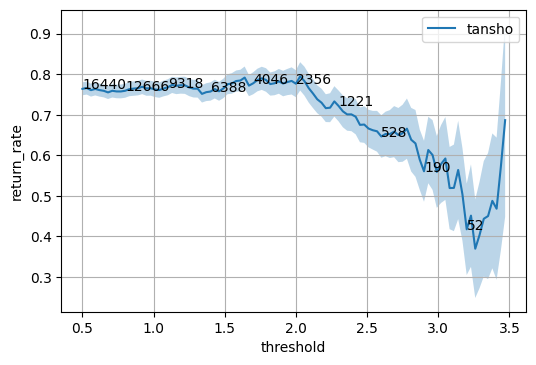

In [19]:
#回収率をプロット
simulation.plot_single_threshold(returns_df, N_SAMPLES, label='tansho')

### 5.1.2 複勝馬券

In [ ]:
T_RANGE = [0.5, 3.5]
N_SAMPLES = 100
returns = {}

# 「馬の勝ちやすさスコア」の閾値を変化させた時の成績を計算
for i in tqdm(range(N_SAMPLES)):
    # T_RANGEの範囲を、N_SAMPLES等分して、thresholdをfor分で回す
    threshold = T_RANGE[1] * i / N_SAMPLES + T_RANGE[0] * (1 - (i / N_SAMPLES))
    try:
        # 賭ける馬券を決定
        actions = keiba_ai.decide_action(
                score_table, # スコアテーブル
                policies.BetPolicyFukusho, # 賭け方の方針
                threshold=threshold # 「馬の勝ちやすさスコア」の閾値
                )
        returns[threshold] = simulator.calc_returns(actions)
    except Exception as e:
        print(e)
        break
returns_df = pd.DataFrame.from_dict(returns, orient='index')
returns_df.index.name = 'threshold'

In [ ]:
# シミュレーション結果も、models/YYYYMMDD/に保存しておくとわかりやすい。
returns_df.to_pickle('models/20220626/fukusho.pickle')

In [ ]:
# 回収率をプロット
simulation.plot_single_threshold(returns_df, N_SAMPLES, label='fukusho')

### 5.1.3 馬連BOX

In [ ]:
T_RANGE = [0.5, 3.5]
N_SAMPLES = 100
returns = {}

# 「馬の勝ちやすさスコア」の閾値を変化させた時の成績を計算
for i in tqdm(range(N_SAMPLES)):
    # T_RANGEの範囲を、N_SAMPLES等分して、thresholdをfor分で回す
    threshold = T_RANGE[1] * i / N_SAMPLES + T_RANGE[0] * (1 - (i / N_SAMPLES))
    try:
        # 賭ける馬券を決定
        actions = keiba_ai.decide_action(
                score_table, # スコアテーブル
                policies.BetPolicyUmarenBox, # 賭け方の方針
                threshold=threshold # 「馬の勝ちやすさスコア」の閾値
                )
        returns[threshold] = simulator.calc_returns(actions)
    except Exception as e:
        print(e)
        break
returns_df = pd.DataFrame.from_dict(returns, orient='index')
returns_df.index.name = 'threshold'

In [ ]:
# シミュレーション結果も、models/YYYYMMDD/に保存しておくとわかりやすい。
returns_df.to_pickle('models/20220626/umarenbox.pickle')

In [ ]:
# 回収率をプロット
simulation.plot_single_threshold(returns_df, N_SAMPLES, label='umarenbox')

### 5.1.4 馬単BOX

In [ ]:
T_RANGE = [0.5, 3.5]
N_SAMPLES = 100
returns = {}

# 「馬の勝ちやすさスコア」の閾値を変化させた時の成績を計算
for i in tqdm(range(N_SAMPLES)):
    # T_RANGEの範囲を、N_SAMPLES等分して、thresholdをfor分で回す
    threshold = T_RANGE[1] * i / N_SAMPLES + T_RANGE[0] * (1 - (i / N_SAMPLES))
    try:
        # 賭ける馬券を決定
        actions = keiba_ai.decide_action(
                score_table, # スコアテーブル
                policies.BetPolicyUmatanBox, # 賭け方の方針
                threshold=threshold # 「馬の勝ちやすさスコア」の閾値
                )
        returns[threshold] = simulator.calc_returns(actions)
    except Exception as e:
        print(e)
        break
returns_df = pd.DataFrame.from_dict(returns, orient='index')
returns_df.index.name = 'threshold'

In [ ]:
# シミュレーション結果も、models/YYYYMMDD/に保存しておくとわかりやすい。
returns_df.to_pickle('models/20220626/umatanbox.pickle')

In [ ]:
# 回収率をプロット
simulation.plot_single_threshold(returns_df, N_SAMPLES, label='umatanbox')

### 5.1.5 ワイドBOX

In [ ]:
T_RANGE = [0.5, 3.5]
N_SAMPLES = 100
returns = {}

# 「馬の勝ちやすさスコア」の閾値を変化させた時の成績を計算
for i in tqdm(range(N_SAMPLES)):
    # T_RANGEの範囲を、N_SAMPLES等分して、thresholdをfor分で回す
    threshold = T_RANGE[1] * i / N_SAMPLES + T_RANGE[0] * (1 - (i / N_SAMPLES))
    try:
        # 賭ける馬券を決定
        actions = keiba_ai.decide_action(
                score_table, # スコアテーブル
                policies.BetPolicyWideBox, # 賭け方の方針
                threshold=threshold # 「馬の勝ちやすさスコア」の閾値
                )
        returns[threshold] = simulator.calc_returns(actions)
    except Exception as e:
        print(e)
        break
returns_df = pd.DataFrame.from_dict(returns, orient='index')
returns_df.index.name = 'threshold'

In [ ]:
# シミュレーション結果も、models/YYYYMMDD/に保存しておくとわかりやすい。
returns_df.to_pickle('models/20220626/widebox.pickle')

In [ ]:
# 回収率をプロット
simulation.plot_single_threshold(returns_df, N_SAMPLES, label='widebox')

### 5.1.6 三連複BOX

In [ ]:
T_RANGE = [0.5, 3.5]
N_SAMPLES = 100
returns = {}

# 「馬の勝ちやすさスコア」の閾値を変化させた時の成績を計算
for i in tqdm(range(N_SAMPLES)):
    # T_RANGEの範囲を、N_SAMPLES等分して、thresholdをfor分で回す
    threshold = T_RANGE[1] * i / N_SAMPLES + T_RANGE[0] * (1 - (i / N_SAMPLES))
    try:
        # 賭ける馬券を決定
        actions = keiba_ai.decide_action(
                score_table, # スコアテーブル
                policies.BetPolicySanrenpukuBox, # 賭け方の方針
                threshold=threshold # 「馬の勝ちやすさスコア」の閾値
                )
        returns[threshold] = simulator.calc_returns(actions)
    except Exception as e:
        print(e)
        break
returns_df = pd.DataFrame.from_dict(returns, orient='index')
returns_df.index.name = 'threshold'

In [ ]:
# シミュレーション結果も、models/YYYYMMDD/に保存しておくとわかりやすい。
returns_df.to_pickle('models/20220626/sanrenpukubox.pickle')

In [ ]:
# 回収率をプロット
simulation.plot_single_threshold(returns_df, N_SAMPLES, label='sanrenpukubox')

### 5.1.7 三連単BOX

In [ ]:
T_RANGE = [0.5, 3.5]
N_SAMPLES = 100
returns = {}

# 「馬の勝ちやすさスコア」の閾値を変化させた時の成績を計算
for i in tqdm(range(N_SAMPLES)):
    # T_RANGEの範囲を、N_SAMPLES等分して、thresholdをfor分で回す
    threshold = T_RANGE[1] * i / N_SAMPLES + T_RANGE[0] * (1 - (i / N_SAMPLES))
    try:
        # 賭ける馬券を決定
        actions = keiba_ai.decide_action(
                score_table, # スコアテーブル
                policies.BetPolicySanrentanBox, # 賭け方の方針
                threshold=threshold # 「馬の勝ちやすさスコア」の閾値
                )
        returns[threshold] = simulator.calc_returns(actions)
    except Exception as e:
        print(e)
        break
returns_df = pd.DataFrame.from_dict(returns, orient='index')
returns_df.index.name = 'threshold'

In [ ]:
# シミュレーション結果も、models/YYYYMMDD/に保存しておくとわかりやすい。
returns_df.to_pickle('models/20220626/sanrentanbox.pickle')

In [ ]:
# 回収率をプロット
simulation.plot_single_threshold(returns_df, N_SAMPLES, label='sanrentanbox')

## 5.2. 複数馬券
未実装

## 5.3. 複数threshold
未実装だが、以下のようなコードになる予定。

In [274]:
T1_RANGE = [2.5, 3.5]
MIN_T2 = 1
N_SAMPLES = 10

returns = {}
#「馬の勝ちやすさスコア」の閾値を変化させた時の成績を計算
idx = 0
for i in tqdm(range(N_SAMPLES)):
    #T_RANGEの範囲を、N_SAMPLES等分して、thresholdをfor分で回す
    threshold1 = T1_RANGE[1] * i / N_SAMPLES + T1_RANGE[0] * (1-(i/N_SAMPLES))
    for j in range(N_SAMPLES):
        #MIN_T2からthreshold1までをN_SAMPLES等分
        threshold2 = threshold1 * j / N_SAMPLES + MIN_T2 * (1-(j/N_SAMPLES))
        try:
            #print(threshold1, threshold2)
            #賭ける馬券を決定
            actions = keiba_ai.decide_action(
                    score_table, # スコアテーブル
                    policies.BetPolicyTanshoFukusho, # 賭け方の方針(未実装)
                    threshold1=threshold1, #「馬の勝ちやすさスコア」の閾値
                    threshold2=threshold2
                    )
            returns[idx] = simulator.calc_returns(actions)
            idx += 1
        except Exception as e:
            print(e)
            break
returns_df = pd.DataFrame.from_dict(returns, orient='index')

  0%|          | 0/10 [00:00<?, ?it/s]

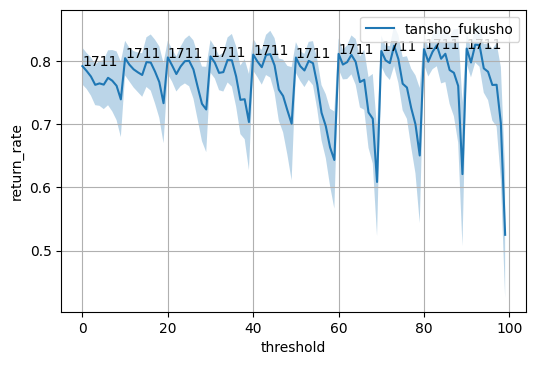

In [273]:
simulation.plot_single_threshold(returns_df.reset_index(), 100, label='tansho_fukusho')

# 6. 当日の予想
例として2022年1月8日のレースを実際に予想する場合を考える。  
https://race.netkeiba.com/top/race_list.html?kaisai_date=20220108

## 6.1. 前日準備

In [20]:
%autoreload

In [ ]:
race_id_list = preparing.scrape_race_id_list(['202506030811']) #レースidを取得
len(race_id_list)

getting race_id_list


  0%|          | 0/1 [00:00<?, ?it/s]

scraping: https://race.netkeiba.com/top/race_list.html?kaisai_date=20220108


24

In [22]:
#出走するhorse_idの取得
horse_id_list = preparing.scrape_horse_id_list(race_id_list)
len(horse_id_list)

sraping horse_id_list


  0%|          | 0/24 [00:00<?, ?it/s]

361

In [ ]:
#horseページのhtmlをスクレイピング
#直近レースが更新されている可能性があるので、skip=Falseにして上書きする
html_files_horse = preparing.scrape_html_horse_with_master(horse_id_list, skip=False)

In [ ]:
#horse_infoテーブルの更新
horse_info_20220108 = preparing.get_rawdata_horse_info(html_files_horse)
preparing.update_rawdata(LocalPaths.RAW_HORSE_INFO_PATH, horse_info_20220108)

In [ ]:
#horse_resultsテーブルの更新
horse_results_20220108 = preparing.get_rawdata_horse_results(html_files_horse)
preparing.update_rawdata(LocalPaths.RAW_HORSE_RESULTS_PATH, horse_results_20220108)

In [ ]:
#pedsテーブルの更新
html_files_peds = preparing.scrape_html_ped(horse_id_list, skip=True)
peds_20220108 = preparing.get_rawdata_peds(html_files_peds)
preparing.update_rawdata(LocalPaths.RAW_PEDS_PATH, peds_20220108)

In [27]:
#processorの更新
horse_info_processor = preprocessing.HorseInfoProcessor(
    filepath=LocalPaths.RAW_HORSE_INFO_PATH)
horse_results_processor = preprocessing.HorseResultsProcessor(
    filepath=LocalPaths.RAW_HORSE_RESULTS_PATH)
peds_processor = preprocessing.PedsProcessor(filepath=LocalPaths.RAW_PEDS_PATH)

In [32]:
#モデルの準備
keiba_ai = training.KeibaAIFactory.load('models/20220626/basemodel_2018_2021.pickle')

## 6.2. 前日全レース予想

In [ ]:
%autoreload

In [ ]:
# 前日全レース予想用のレースidとレース発走時刻を取得
target_race_id_list, target_race_time_list = preparing.scrape_race_id_race_time_list('20221001')
print(len(target_race_id_list))
print(len(target_race_time_list))
yesterday = True

In [ ]:
# 一時的に出馬表を保存するパスを指定
filepath = 'data/tmp/shutuba.pickle'
today = '2022/10/01'

for race_id, race_time in zip(target_race_id_list, target_race_time_list):
    # 出馬表の取得
    preparing.scrape_shutuba_table(race_id, today, filepath)

    # 前日予想の場合
    if yesterday:
        # 前日予想の場合、馬体重を0（0）に補正
        pd2 = pd.read_pickle(filepath)
        pd2[ResultsCols.WEIGHT_AND_DIFF] = '0(0)'
        # 前日予想の場合、天候と馬場状態が公開されていない場合はこちらを有効にする
        #pd2['weather'] = '晴'
        #pd2['ground_state'] = '良'
        pd2.to_pickle(filepath)

    # 出馬表の加工
    shutuba_table_processor = preprocessing.ShutubaTableProcessor(filepath)

    # テーブルのマージ
    shutuba_data_merger = preprocessing.ShutubaDataMerger(
        shutuba_table_processor,
        horse_results_processor,
        horse_info_processor,
        peds_processor,
        target_cols=TARGET_COLS,
        group_cols=GROUP_COLS
    )
    shutuba_data_merger.merge()

    # 特徴量エンジニアリング
    feature_enginnering_shutuba = preprocessing.FeatureEngineering(shutuba_data_merger) \
        .add_interval()\
        .add_agedays()\
        .dumminize_ground_state()\
        .dumminize_race_type()\
        .dumminize_sex()\
        .dumminize_weather()\
        .encode_horse_id()\
        .encode_jockey_id()\
        .encode_trainer_id()\
        .encode_owner_id()\
        .encode_breeder_id()\
        .dumminize_kaisai()\
        .dumminize_around()\
        .dumminize_race_class()

    # 予測
    X = feature_enginnering_shutuba.featured_data.drop(['date'], axis=1)

    # 当日の出走情報テーブル（前処理前）
    df_tmp = shutuba_table_processor.raw_data[:1]

    i = 0
    for num in list(Master.PLACE_DICT.values()):
        if num == race_id[4:6]:
            print(list(Master.PLACE_DICT)[i] + race_id[10:12] + 'R ' + race_time + '発走 ' + str(df_tmp.iat[0, 12])
                + str(df_tmp.iat[0, 10]) + 'm ' + str(df_tmp.iat[0, 13]) + ' ' + str(df_tmp.iat[0, 15]))
            break
        i += 1

    print(keiba_ai.calc_score(X, policies.StdScorePolicy).sort_values('score', ascending=False))

## 6.3. レース直前データ処理（当日レース予想）

In [28]:
%autoreload

In [ ]:
# 馬体重の発表されたレースID、レース時刻を取得（レース当日用）
target_race_id_list, target_race_time_list = preparing.create_active_race_id_list()
print((target_race_id_list))
print((target_race_time_list))

In [ ]:
# 一時的に出馬表を保存するパスを指定
filepath = 'data/tmp/shutuba.pickle'
#today = '2022/10/01'
today = datetime.datetime.now().date().strftime('%Y/%m/%d')

for race_id, race_time in zip(target_race_id_list, target_race_time_list):
    # 出馬表の取得
    preparing.scrape_shutuba_table(race_id, today, filepath)

    # 出馬表の加工
    shutuba_table_processor = preprocessing.ShutubaTableProcessor(filepath)

    # テーブルのマージ
    shutuba_data_merger = preprocessing.ShutubaDataMerger(
        shutuba_table_processor,
        horse_results_processor,
        horse_info_processor,
        peds_processor,
        target_cols=TARGET_COLS,
        group_cols=GROUP_COLS
    )
    shutuba_data_merger.merge()

    # 特徴量エンジニアリング
    feature_enginnering_shutuba = preprocessing.FeatureEngineering(shutuba_data_merger) \
        .add_interval()\
        .add_agedays()\
        .dumminize_ground_state()\
        .dumminize_race_type()\
        .dumminize_sex()\
        .dumminize_weather()\
        .encode_horse_id()\
        .encode_jockey_id()\
        .encode_trainer_id()\
        .encode_owner_id()\
        .encode_breeder_id()\
        .dumminize_kaisai()\
        .dumminize_around()\
        .dumminize_race_class()

    # 予測
    X = feature_enginnering_shutuba.featured_data.drop(['date'], axis=1)

    # 当日の出走情報テーブル（前処理前）
    df_tmp = shutuba_table_processor.raw_data[:1]
    #df_tmp['race_type'] tmp.iat[0, 12]
    #df_tmp['around'] 13
    #df_tmp['weather'] 14
    #df_tmp['ground_state'] 15
    #df_tmp['race_class']16

    i = 0
    for num in list(Master.PLACE_DICT.values()):
        if num == race_id[4:6]:
            print(list(Master.PLACE_DICT)[i] + race_id[10:12] + 'R ' + race_time + '発走 ' + str(df_tmp.iat[0, 12])
                + str(df_tmp.iat[0, 10]) + 'm ' + str(df_tmp.iat[0, 13]) + ' ' + str(df_tmp.iat[0, 15]))
            break
        i += 1

    print(keiba_ai.calc_score(X, policies.StdScorePolicy).sort_values('score', ascending=False))

## 6.4. レース直前データ処理（旧方式）

In [ ]:
filepath = 'data/tmp/shutuba.pickle' #一時的に出馬表を保存するパスを指定
preparing.scrape_shutuba_table(race_id_list[0], '2022/1/8', filepath) #馬体重が発表されたら、出馬表を取得
shutuba_table_processor = preprocessing.ShutubaTableProcessor(filepath) #出馬表の加工

In [30]:
#テーブルのマージ
shutuba_data_merger = preprocessing.ShutubaDataMerger(
    shutuba_table_processor,
    horse_results_processor,
    horse_info_processor,
    peds_processor,
    target_cols=TARGET_COLS,
    group_cols=GROUP_COLS
)

shutuba_data_merger.merge()

separating horse results by date


  0%|          | 0/1 [00:00<?, ?it/s]

merging horse_results


  0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
#特徴量エンジニアリング
feature_enginnering_shutuba = preprocessing.FeatureEngineering(shutuba_data_merger)\
    .add_interval()\
    .add_agedays()\
    .dumminize_ground_state()\
    .dumminize_race_type()\
    .dumminize_sex()\
    .dumminize_weather()\
    .encode_horse_id()\
    .encode_jockey_id()\
    .encode_trainer_id()\
    .encode_owner_id()\
    .encode_breeder_id()\
    .dumminize_kaisai()\
    .dumminize_around()\
    .dumminize_race_class()

In [32]:
#予測
X = feature_enginnering_shutuba.featured_data.drop(['date'], axis=1)
keiba_ai.calc_score(X, policies.StdScorePolicy).sort_values('score', ascending=False)

,馬番,単勝,score
202206010201,5,4.7,1.972623
202206010201,3,4.3,1.698477
202206010201,15,4.5,1.292167
202206010201,4,5.7,0.754306
202206010201,11,5.4,0.706008
202206010201,6,16.9,0.401887
202206010201,16,14.2,-0.070303
202206010201,1,26.7,-0.260754
202206010201,13,29.8,-0.300251
202206010201,9,101.3,-0.481400
